# Conformer generator

In [1]:
import veloxchem as vlx

## Systematic Search

We define a structure by using a SMILES string.

In [2]:
molecule = vlx.Molecule.read_smiles(
    "CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C"
)  # this is SMILES for Penicillin G
molecule.show(atom_indices=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

ConformerGenerator class can generate all possible conformations and apply energy minimization process with MMforcefield

In [3]:
conf = vlx.ConformerGenerator()
conformers_dict = conf.generate(molecule)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

show the lowest energy conformer

In [4]:
conf.show_global_minimum()

Global minimum conformer with energy -139.183 kJ/mol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

 show more conformers

In [5]:
conf.show_conformers(number=3, atom_indices=True)

Conformer 1 with energy -139.183 kJ/mol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Conformer 2 with energy -137.593 kJ/mol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Conformer 3 with energy -135.655 kJ/mol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

we can provide resp charges as partial charges to improve the used MMforcefield quality

In [6]:
basis = vlx.MolecularBasis.read(molecule, "6-31g*")
resp = vlx.RespChargesDriver()
resp.ostream.mute()
partial_charges = resp.compute(molecule, basis, 'resp')

In [7]:
conf = vlx.ConformerGenerator()
conf.partial_charges = partial_charges
conformers_dict = conf.generate(molecule)
conf.show_global_minimum(atom_indices=True)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

we can apply implicit solvent model for the energy minimization 

In [8]:
conf = vlx.ConformerGenerator()
conf.ostream.mute()
conf.show_available_implicit_solvent_models()

conf.implicit_solvent_model = "obc2"
conformers_dict = conf.generate(molecule)
conf.show_global_minimum(atom_indices=True)

Available implicit solvent files:
gbn.xml
hct.xml
obc1.xml
gbn2.xml
obc2.xml
                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10       

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

show more conformers

In [9]:
conf.show_conformers(number=3, atom_indices=True)

Conformer 1 with energy -244.408 kJ/mol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Conformer 2 with energy -241.878 kJ/mol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Conformer 3 with energy -239.863 kJ/mol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Extract conformers from an MD simulation

Using the OpenMMDynamics class, we can perform Molecular Dynamics

In [10]:
molecule = vlx.Molecule.read_xyz_file("data/tq-polymer.xyz")
molecule.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

The next cell is used to calculate RESP charges for the system. However, since this calculation is time consuming, the next cell is commented and the partial charges are provided in the following cell.

In [11]:
#basis = vlx.MolecularBasis.read(molecule, "6-31g*")
#resp = vlx.RespChargesDriver()
#partial_charges = resp.compute(molecule, basis, 'resp')
#print(partial_charges)

In [12]:
partial_charges = [
 -0.232669,  -0.048234,  -0.007686,   0.100183,   0.386987, 
 -0.249451,   0.194951,   0.114678,   0.062361,   0.005422, 
 -0.107660,  -0.198262,   0.016200,  -0.090324,  -0.235291, 
  0.062137,   0.419456,  -0.531796,   0.139008,   0.164115, 
 -0.086069,  -0.044513,   0.199556,  -0.170296,  -0.180157, 
 -0.113322,   0.158106,  -0.081966,  -0.128774,  -0.239557, 
 -0.136771,   0.301582,  -0.203020,   0.138342,   0.136587, 
 -0.316948,  -0.031826,   0.137154,   0.118999,   0.161926, 
  0.130632,   0.173826,  -0.332761,  -0.005770,   0.079527, 
  0.079527,   0.065962,   0.065962,  -0.242085,  -0.087463, 
  0.012935,   0.061502,   0.266088,  -0.001114,   0.103725, 
  0.180948,   0.015843,  -0.123259,  -0.242504,   0.056159, 
 -0.118009,  -0.247948,   0.196117,   0.205390,  -0.298929, 
  0.084877,   0.079527,   0.158266,  -0.146844,  -0.040754, 
  0.251020,  -0.203210,  -0.160584,  -0.153068,   0.159255, 
 -0.052933,  -0.119071,  -0.248423,  -0.079409,   0.161470, 
 -0.134947,   0.149941,   0.170980,  -0.324275,  -0.042230, 
  0.077237,   0.144781,   0.111871,   0.146494,   0.118468, 
 -0.259568,  -0.020448,   0.079707,   0.079707,   0.065165, 
  0.065165,   0.065962,   0.065165,   0.079707,   0.091273, 
 -0.257720,  -0.061333,   0.006290,   0.053719,   0.241539, 
  0.008275,   0.177544,   0.136687,   0.102227,   0.036805, 
 -0.167956,  -0.170007,   0.026697,  -0.121728,  -0.219001, 
  0.179470,   0.218907,  -0.269483,   0.130723,   0.169499, 
 -0.141246,  -0.045503,   0.231592,  -0.203064,  -0.149092, 
 -0.160352,   0.156878,  -0.087277,  -0.117300,  -0.253518, 
 -0.105665,   0.201677,  -0.129198,   0.154380,   0.144414, 
 -0.311560,  -0.050335,   0.169505,   0.117806,   0.078577, 
  0.104835,   0.177924,  -0.277724,  -0.030888,   0.083872, 
  0.083872,   0.071197,   0.071197,  -0.205491,  -0.105325, 
  0.004215,   0.071387,   0.205212,   0.002548,   0.100560, 
  0.158667,   0.021198,  -0.109115,  -0.258546,   0.071271, 
 -0.137911,  -0.231297,   0.150851,   0.232605,  -0.255901, 
  0.069410,   0.083872,   0.165216,  -0.118096,  -0.035060, 
  0.232363,  -0.199482,  -0.160185,  -0.163606,   0.159908, 
 -0.075661,  -0.119060,  -0.255872,  -0.099171,   0.211171, 
 -0.146255,   0.167897,   0.176623,  -0.312825,  -0.059878, 
  0.072443,   0.144852,   0.119482,   0.152389,   0.115928, 
 -0.288919,  -0.023122,   0.084877,   0.084877,   0.069835, 
  0.069835,   0.071197,   0.069835,  -0.277164,  -0.038921, 
  0.002052,   0.076138,   0.220403,   0.008773,   0.186555, 
  0.122042,   0.064124,   0.006807,  -0.102455,  -0.211713, 
  0.025525,  -0.100865,  -0.225711,   0.134458,   0.220855, 
 -0.239842,   0.146481,   0.157469,  -0.084636,  -0.038788, 
  0.191114,  -0.167495,  -0.173886,  -0.139361,   0.158124, 
 -0.115619,  -0.110832,  -0.246506,  -0.111697,   0.200255, 
 -0.102728,   0.147022,   0.137019,  -0.311401,  -0.028076, 
  0.157916,   0.121854,   0.070941,   0.097209,   0.174835, 
 -0.277731,  -0.058498,   0.078470,   0.078470,   0.079650, 
  0.079650,  -0.239752,  -0.093417,   0.013395,   0.065722, 
  0.252234,   0.002507,   0.097142,   0.176412,   0.012295, 
 -0.109919,  -0.253222,   0.062514,  -0.121338,  -0.239217, 
  0.179990,   0.225267,  -0.293594,   0.084407,   0.078470, 
  0.163374,  -0.156555,  -0.027891,   0.267086,  -0.220163, 
 -0.153943,  -0.138332,   0.156524,  -0.068274,  -0.107757, 
 -0.248650,  -0.083734,   0.150618,  -0.128876,   0.155916, 
  0.171802,  -0.332583,  -0.033320,   0.071492,   0.147678, 
  0.114573,   0.140265,   0.115307,  -0.249021,  -0.028279, 
  0.077074,   0.077074,   0.068191,   0.068191,   0.079650, 
  0.068191,   0.077074,   0.085617,  -0.262181,  -0.058425, 
  0.004567,   0.054389,   0.245865,   0.006966,   0.178357, 
  0.134007,   0.098000,   0.031254,  -0.152193,  -0.172248, 
  0.024457,  -0.114391,  -0.218354,   0.183237,   0.211562, 
 -0.273990,   0.125284,   0.158656,  -0.144065,  -0.033540, 
  0.216218,  -0.188581,  -0.155284,  -0.157807,   0.156199, 
 -0.078857,  -0.117411,  -0.254610,  -0.097991,   0.198924, 
 -0.133192,   0.153092,   0.142005,  -0.306650,  -0.071477, 
  0.168597,   0.113979,   0.075060,   0.107961,   0.177382, 
 -0.281830,  -0.022927,   0.092650,   0.092650,   0.069410, 
  0.069410,  -0.234824,  -0.088279,  -0.010610,   0.098104, 
  0.235745,  -0.003237,   0.091918,   0.181039,  -0.033203, 
 -0.007199,  -0.314039,  -0.121585,  -0.064129,  -0.269034, 
  0.181444,   0.222313,  -0.282548,   0.200030,   0.092650, 
  0.175556,  -0.124800,  -0.033037,   0.242958,  -0.205747, 
 -0.157096,  -0.151879,   0.158719,  -0.061573,  -0.112321, 
 -0.250936,  -0.103306,   0.194760,  -0.137261,   0.151524, 
  0.175522,  -0.320888,  -0.048925,   0.069816,   0.146477, 
  0.121450,   0.141797,   0.115735,  -0.282016,  -0.026049, 
  0.084407,   0.084407,   0.070941,   0.070941]

In the next cell, we are using the partial charges to derive a Force-Field using the MMForceFieldGenerator class.

In [13]:
ff_gen = vlx.MMForceFieldGenerator()
ff_gen.partial_charges = partial_charges
ff_gen.create_topology(molecule)


* Info * Sum of partial charges is not a whole number.                                                                    
* Info * Compensating by removing 4.000e-06 from the largest charge.                                                      
                                                                                                                          
* Info * Using GAFF (v2.11) parameters.                                                                                   
         Reference: J. Wang, R. M. Wolf, J. W. Caldwell, P. A. Kollman, D. A. Case, J. Comput. Chem. 2004,
         25, 1157-1174.
                                                                                                                          
* Info * Updated bond length 10-14 (cc-ss) to 0.169 nm                                                                    
* Info * Updated bond length 13-14 (cc-ss) to 0.168 nm                                                                    
* Info *

Once a force field is derived, different functions can be used which use the OpenMM library to perform molecular dynamics simulations. This is available in the OpenMMDynamics class. The next cell gives an example how to run a MD.

In [14]:
opm_dyn = vlx.OpenMMDynamics()
opm_dyn.create_system_from_molecule(molecule,
                                    ff_gen,
                                    filename='tq-polymer',
                                    residue_name='MOL')
opm_dyn.run_md(
            ensemble='NVE',
            temperature=300, 
            timestep=2.0, 
            nsteps=100000, 
            traj_file='tq_polymer_md.pdb')

* Info * System parameters written to tq-polymer_system.xml                                                               
* Info * System coordinates written to tq-polymer_system.pdb                                                              
MD Simulation parameters:
Ensemble: NVE
Friction: 1.0 1/ps
Timestep: 2.0 fs
Total simulation time in ns: 0.2
Step: 0 / 100000 Time: 0.0 ps
Potential Energy 1635.6505643427372 kJ/mol
Kinetic Energy: 0.02960370507211252 kJ/mol
Temperature: 0.0068735662683653805 K
Total Energy: 1635.6801680478093 kJ/mol
------------------------------------------------------------
Step: 1000 / 100000 Time: 2.0 ps
Potential Energy 1633.576081842184 kJ/mol
Kinetic Energy: 2.104187978311529 kJ/mol
Temperature: 0.48856301854077255 K
Total Energy: 1635.6802698204956 kJ/mol
------------------------------------------------------------
Step: 2000 / 100000 Time: 4.0 ps
Potential Energy 1633.5860777795315 kJ/mol
Kinetic Energy: 2.09561772228858 kJ/mol
Temperature: 0.48657312

Moreover, we have developed a function to extract conformers from the MD simulation at high temperature. The user can define a number of snapshots that will be optimized and save. In addition, those snapshots can be filtered to avoid that the same conformer is present multiple timess by using the option unique_conformers.

In [15]:
conformers_dict = opm_dyn.conformational_sampling(
                                ensemble='NVT', 
                                temperature=1000, 
                                timestep=2.0, 
                                nsteps=100000, 
                                snapshots=500,
                                unique_conformers=True,
                                qm_driver=None,
                                basis=None,
                                constraints=None)

* Info * Minimized energy: 1652.6270320415497                                                                             
* Info * Saved coordinates for step 200                                                                                   
* Info * Minimized energy: 1673.1233963370323                                                                             
* Info * Saved coordinates for step 400                                                                                   
* Info * Minimized energy: 1684.2803455591202                                                                             
* Info * Saved coordinates for step 600                                                                                   
* Info * Minimized energy: 1674.5865921378136                                                                             
* Info * Saved coordinates for step 800                                                                                   
* Info * Minimiz

In [16]:
opm_dyn.show_conformers(number=10)

* Info * 
Conformation 1: Energy: 1615.311 kJ/mol, Weight: 0.8667                                                         


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

* Info * 
Conformation 2: Energy: 1621.475 kJ/mol, Weight: 0.0732                                                         


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

* Info * 
Conformation 3: Energy: 1624.210 kJ/mol, Weight: 0.0245                                                         


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

* Info * 
Conformation 4: Energy: 1625.980 kJ/mol, Weight: 0.0120                                                         


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

* Info * 
Conformation 5: Energy: 1625.981 kJ/mol, Weight: 0.0120                                                         


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

* Info * 
Conformation 6: Energy: 1628.069 kJ/mol, Weight: 0.0052                                                         


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

* Info * 
Conformation 7: Energy: 1629.718 kJ/mol, Weight: 0.0027                                                         


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

* Info * 
Conformation 8: Energy: 1630.792 kJ/mol, Weight: 0.0017                                                         


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

* Info * 
Conformation 9: Energy: 1632.572 kJ/mol, Weight: 0.0009                                                         


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

* Info * 
Conformation 10: Energy: 1634.457 kJ/mol, Weight: 0.0004                                                        


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

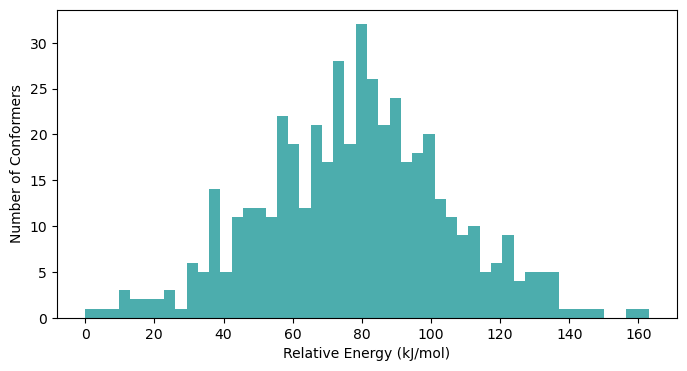

In [17]:
# plot the distribution of the relative energies of the conformers
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(conformers_dict['energies']-np.min(conformers_dict['energies']),
        bins=50, 
        color='darkcyan', 
        alpha=0.7)
plt.xlabel('Relative Energy (kJ/mol)')
plt.ylabel('Number of Conformers')

plt.savefig('conformer_energy_distribution.pdf')
plt.show()


In [18]:
# show the most stable conformer and write it to an XYZ file
conformers_dict['molecules'][0].show()
conformers_dict['molecules'][0].write_xyz_file('tq-polymer-0.xyz')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.